# Tratamento 

##### Aqui temos o tratamento inicial do arquivo que iremos utilizar *googleplaystore.csv*

- O tratamento consiste na remoção de linhas duplicadas, e na remoção do cifrão '$' da coluna de preços. Essas mudanças serão armazenadas no *arquivo_limpo.csv*, que será utilizado daqui pra frente.

In [2]:
import pandas as pd

df = pd.read_csv('googleplaystore.csv')

df_sem_duplicatas = df.drop_duplicates(subset=df.columns[0])

df_sem_duplicatas.to_csv('arquivo_limpo.csv', index=False, header=False)

df = pd.read_csv('arquivo_limpo.csv')  

def remover_cifrão(valor):
    if pd.isna(valor):
        return valor  
    elif isinstance(valor, str) and valor.startswith('$'):
        return valor[1:]  
    else:
        return '0'  

df.iloc[:, 7] = df.iloc[:, 7].apply(lambda x: remover_cifrão(x)) 

df.to_csv('arquivo_limpo.csv', index=False, header=False)

# Script 1

##### Gráfico de barras utilizando a biblioteca **matplotlib**, dos aplicativos com maior número de instalação.

<ipython-input-3-ef79892dfd26>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  num_instalacoes = num_instalacoes.str.replace('+', '').str.replace(',', '').astype(int)


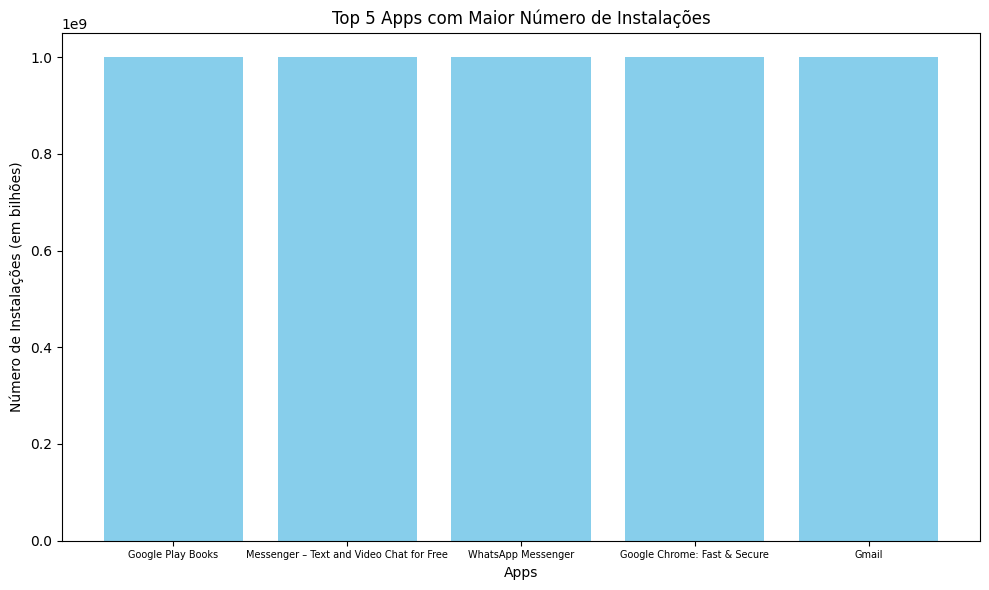

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('arquivo_limpo.csv')

top_apps = df[df.iloc[:, 5] == '1,000,000,000+'].head(5)


nomes_apps = top_apps.iloc[:, 0]
num_instalacoes = top_apps.iloc[:, 5]

num_instalacoes = num_instalacoes.str.replace('+', '').str.replace(',', '').astype(int)

plt.figure(figsize=(10, 6))
plt.bar(nomes_apps, num_instalacoes, color='skyblue')
plt.xlabel('Apps')
plt.ylabel('Número de Instalações (em bilhões)')
plt.title('Top 5 Apps com Maior Número de Instalações')


plt.xticks(rotation=0, ha='center', fontsize=7)

plt.tight_layout()
plt.show()


# Script 2

##### Gráfico de pizza mostrando as categorias de apps presentes no nosso database, e sua porcentagem. 

- Possui um pequeno tratamento em uma linha que estava errada no nosso banco, e categoriza as categorias que possuem menos de 2% do total como **Outros**, a fim de melhorar a visualização do gráfico.

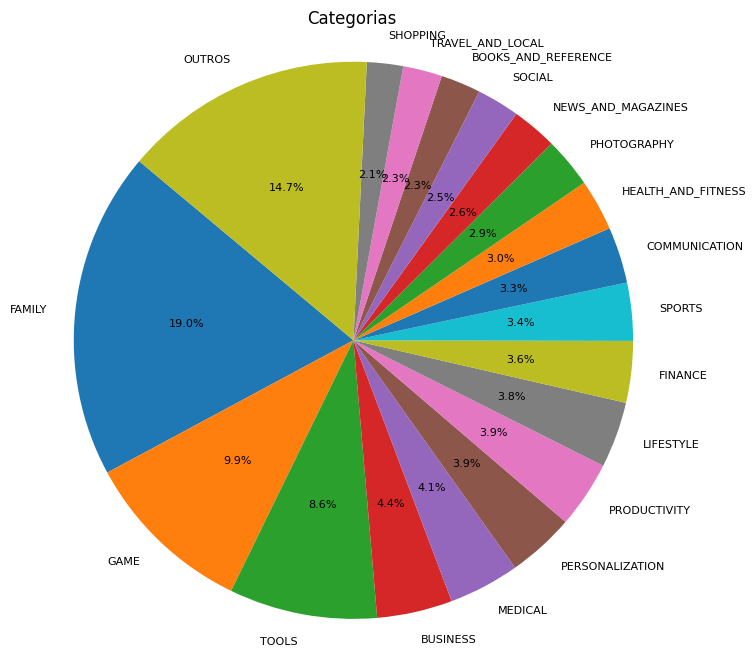

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('arquivo_limpo.csv')

categorias_contagem = df[df.iloc[:, 1] != '1.9'].iloc[:, 1].value_counts()

total_ocorrencias = categorias_contagem.sum()
categorias_outros = categorias_contagem[categorias_contagem / total_ocorrencias < 0.02]

categorias_contagem['OUTROS'] = categorias_outros.sum()
categorias_contagem = categorias_contagem.drop(categorias_outros.index)

plt.figure(figsize=(8, 8))
plot = categorias_contagem.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Categorias')
plt.ylabel('')
plt.axis('equal')  

for text in plot.texts:
    text.set_fontsize(8)

plt.show()

# Script 3

##### Retorna o aplicativo mais caro do nosso database.

In [5]:
import pandas as pd

df = pd.read_csv('arquivo_limpo.csv', header=None)

df.iloc[:, 7] = df.iloc[:, 7].replace('[\$,]', '', regex=True).astype(float)

app_mais_caro = df.iloc[df.iloc[:, 7].idxmax()]


print("Aplicativo Mais Caro:")
print("Nome:", app_mais_caro[0])
print("Valor (em dólares):", app_mais_caro[7])

Aplicativo Mais Caro:
Nome: I'm Rich - Trump Edition
Valor (em dólares): 400.0


# Script 4

##### Retorna a quantidade de aplicativos que são **Mature 17+**.

In [6]:
import pandas as pd

df = pd.read_csv('arquivo_limpo.csv', header=None)

qtd_apps_mature = df.iloc[:, 8].str.contains("Mature 17+").sum()


print("Quantidade de Apps com 'Mature 17+':", qtd_apps_mature)

Quantidade de Apps com 'Mature 17+': 394


# Script 5

##### Retorna os 10 apps com maior número de avaliações, ordenados de forma decrescente.

In [30]:
import pandas as pd
import warnings

df = pd.read_csv('arquivo_limpo.csv', header=None)
                 
df_valid_reviews = df[df[3].str.isnumeric()].copy()

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    df_valid_reviews.loc[:, 3] = df_valid_reviews.loc[:, 3].astype(int)

df_valid_reviews = df_valid_reviews[df_valid_reviews[3] > 0]

df_ordenado = df_valid_reviews.sort_values(by=3, ascending=False)

top_10_apps_reviews = df_ordenado.iloc[:10, [0, 3]]

print("Top 10 Apps com Mais Reviews:")
for index, row in top_10_apps_reviews.iterrows():
    print(f"{row[0]} - {row[3]} Reviews")

Top 10 Apps com Mais Reviews:
Facebook - 78158306 Reviews
WhatsApp Messenger - 69119316 Reviews
Instagram - 66577313 Reviews
Messenger – Text and Video Chat for Free - 56642847 Reviews
Clash of Clans - 44891723 Reviews
Clean Master- Space Cleaner & Antivirus - 42916526 Reviews
Subway Surfers - 27722264 Reviews
YouTube - 25655305 Reviews
Security Master - Antivirus, VPN, AppLock, Booster - 24900999 Reviews
Clash Royale - 23133508 Reviews


# Script 6 

##### 

In [22]:
import pandas as pd

df = pd.read_csv('arquivo_limpo.csv', header=None)

df_valid_reviews = df[df[3].str.isnumeric()].copy()

df_valid_reviews[3] = df_valid_reviews[3].astype(int)

df_valid_reviews = df_valid_reviews[df_valid_reviews[3] > 0]

df_ordenado = df_valid_reviews.sort_values(by=3, ascending=False)

top_app_reviews = df_ordenado.iloc[:1, [0, 3]]


print("Top App com Mais Reviews:")
for index, row in top_app_reviews.iterrows():
    print(f"{row[0]} - {row[3]} Reviews")

apps_rating_50 = df[df[2] == '5.0'].iloc[:10]


print("\nLista de 10 Aplicativos com Rating 5.0:")
for index, row in apps_rating_50.iterrows():
    print(f"App: {row[0]}, Rating: {row[2]}")

Top App com Mais Reviews:
Facebook - 78158306 Reviews

Lista de 10 Aplicativos com Rating 5.0:
App: Hojiboy Tojiboyev Life Hacks, Rating: 5.0
App: American Girls Mobile Numbers, Rating: 5.0
App: Awake Dating, Rating: 5.0
App: Spine- The dating app, Rating: 5.0
App: Girls Live Talk - Free Text and Video Chat, Rating: 5.0
App: Online Girls Chat Group, Rating: 5.0
App: Speeding Joyride & Car Meet App, Rating: 5.0
App: SUMMER SONIC app, Rating: 5.0
App: Prosperity, Rating: 5.0
App: Mindvalley U Tallinn 2018, Rating: 5.0


# Script 7

##### Retorna um gráfico de linhas que mostra a porcentagem da classificação dos aplicativos.

- Filtrando apenas as classificações que possuem pelo menos 1% de relevância, tornando o gráfico mais fácil de ser entendido.

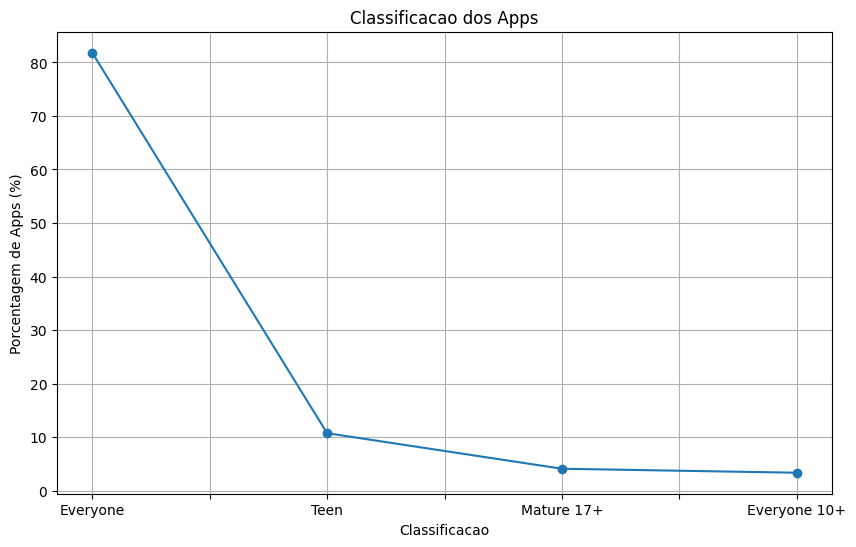

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('arquivo_limpo.csv', header=None)


rating_counts = df[8].value_counts(normalize=True) * 100  

rating_counts_filtrado = rating_counts[rating_counts >= 1]

plt.figure(figsize=(10, 6))
rating_counts_filtrado.plot(kind='line', marker='o', linestyle='-')
plt.title('Classificacao dos Apps')
plt.xlabel('Classificacao')
plt.ylabel('Porcentagem de Apps (%)')
plt.grid(True)
plt.show()

# Script 8

##### Retorna um gráfico de dispersão dos diversos ratings que os aplicativos possuem, numa faixa do 3.25 até o 5.0.

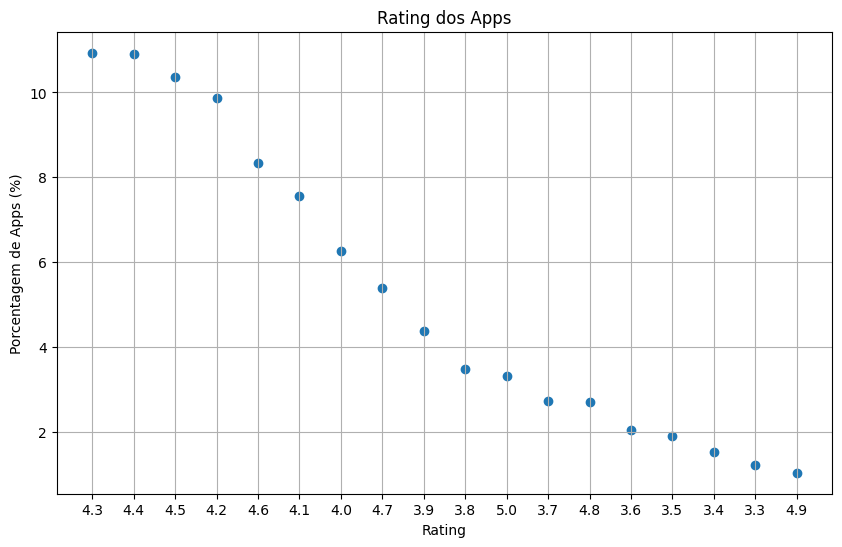

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('arquivo_limpo.csv', header=None)

rating_counts = df[2].value_counts(normalize=True) * 100  


rating_counts_filtrado = rating_counts[rating_counts >= 1]


df_plot = pd.DataFrame({'Rating': rating_counts_filtrado.index, 'Porcentagem de Apps (%)': rating_counts_filtrado.values})


plt.figure(figsize=(10, 6))
plt.scatter(df_plot['Rating'], df_plot['Porcentagem de Apps (%)'], marker='o')
plt.title('Rating dos Apps')
plt.xlabel('Rating')
plt.ylabel('Porcentagem de Apps (%)')
plt.grid(True)
plt.show()